# **Binar Academy Data Science**
# Challenge 2. Telco Customer Churn

    Perkembangan industri telekomunikasi sangatlah cepat, hal ini dapat dilihat dari perilaku masyarakat yang menggunakan internet dalam berkomunikasi. Perilaku ini menyebabkan banyaknya perusahaan telekomunikasi dan meningkatnya internet service provider yang dapat menimbulkan persaingan antar provider.
    
    Pelanggan memiliki hak dalam memilih provider yang sesuai dan dapat beralih dari provider sebelumnya yang diartikan sebagai Customer Churn. Peralihan ini dapat menyebabkan berkurangnya pendapatan bagi perusahaan telekomunikasi sehingga penting untuk ditangani.

- Problem : Sebanyak 14.1% dari 4250 customer berhenti berlangganan.


- Dataset : 
https://drive.google.com/drive/folders/1iAUjQfmefORPyzT23r5lYkjuzi2XF39y

## 1. Data Preparation

### - Libraries

In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')

### - Importing Data

In [76]:
pd.set_option('display.max_columns', None)

df_train = pd.read_csv(r'C:\Users\Have A Nice DAY\Documents\Document-HAND\Python\00. Template\Binar Academy\Data\train.csv')
df_test = pd.read_csv(r'C:\Users\Have A Nice DAY\Documents\Document-HAND\Python\00. Template\Binar Academy\Data\test.csv')

In [77]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [78]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


### - Functions

In [79]:
# Function for cheking info data
def data_info(x):
    data_type = x.dtypes
    n_unique = x.nunique()
    missing_values = x.isnull().sum()
    percent_missing = (missing_values/len(x))*100
    print(f'Number of Rows, Columns {x.shape}')
    print(f'Number of Duplicated Values {x.duplicated().sum()}')
    
    return pd.DataFrame({'missing_values' : missing_values,
                            'percent_missing' : percent_missing,
                            'numbers_of_unique' : n_unique,
                            'data_type' : data_type}).sort_values(by= 'missing_values', ascending = False)

In [80]:
# Function for selecting categorical and numerical variables
def categorical(x):
    categorical = list(x.columns[x.dtypes == 'object'])
    return categorical

def numerical(x):
    numerical = list(x.columns[x.dtypes == 'int64']) + list(x.columns[x.dtypes == 'float64'])
    return numerical

## 2. Exploratory Data Analysis

### - Data Overview & Missing Values

In [81]:
# Dataset test.csv file
data_info(df_test)

Number of Rows, Columns (750, 20)
Number of Duplicated Values 0


,missing_values,percent_missing,numbers_of_unique,data_type
id,0,0.0,750,int64
state,0,0.0,51,object
total_intl_charge,0,0.0,135,float64
total_intl_calls,0,0.0,17,int64
total_intl_minutes,0,0.0,135,float64
total_night_charge,0,0.0,502,float64
total_night_calls,0,0.0,97,int64
total_night_minutes,0,0.0,628,float64
total_eve_charge,0,0.0,584,float64
total_eve_calls,0,0.0,102,int64


In [82]:
# Dataset train.csv file
data_info(df_train)

Number of Rows, Columns (4250, 20)
Number of Duplicated Values 0


,missing_values,percent_missing,numbers_of_unique,data_type
state,0,0.0,51,object
account_length,0,0.0,215,int64
number_customer_service_calls,0,0.0,10,int64
total_intl_charge,0,0.0,168,float64
total_intl_calls,0,0.0,21,int64
total_intl_minutes,0,0.0,168,float64
total_night_charge,0,0.0,992,float64
total_night_calls,0,0.0,128,int64
total_night_minutes,0,0.0,1757,float64
total_eve_charge,0,0.0,1572,float64


In [83]:
categorical_col = categorical(df_train)
numerical_col = numerical(df_train)

In [84]:
for x in numerical_col:
    print(f'========== {x} ==========')
    print(f'{df_train[x].unique()}')
    print(f'------------------------------------------------------------------------')

========== account_length ==========
[107 137  84  75 121 147 117 141  65  74 168  95 161  85  76  73  77 130
 111 132  57  54  20  49  12  36  78 136  98 135  34 160  64  59 142  97
  52  60  10  96  81 125 174 116 149  38  40  43 113 126 150 138 162  90
  50  82 144  46  70 128  94 155  80  99 120 108 122  93 157  63  41 193
  61  92 163  91 127 110 103 145  56 151  83 139   6 115  62 185 148  32
  68  25 179  67  19 170 106  51 118 208 131  53 105  66  35  88 123  45
 100 215  22  33  86 114  24 119 101 146 143  48 167  89 199 166 158 196
 112 209  16  39 104 129  55  44  79 159 194  87  21 133 224 140  58 109
  71  72 124 102 165  18  30 190  47 152  26  69  31 186 171  28 153 172
 169  13 189 176 156  37  27 134 243  42  23   1 200   5 178 181 182 217
 164 177  11   9 173 154  29 180   3   2   7 232 192 195 197 225 191 201
  15  17 183 212 210 175   4 184 188 204 221 187  14 216 222   8 202]
------------------------------------------------------------------------
========== number

In [85]:
for x in categorical_col:
    print(f'========== {x} ==========')
    print(f'{df_train[x].unique()}')
    print(f'------------------------------------------------------------------------')

========== state ==========
['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
------------------------------------------------------------------------
========== area_code ==========
['area_code_415' 'area_code_408' 'area_code_510']
------------------------------------------------------------------------
========== international_plan ==========
['no' 'yes']
------------------------------------------------------------------------
========== voice_mail_plan ==========
['yes' 'no']
------------------------------------------------------------------------
========== churn ==========
['no' 'yes']
------------------------------------------------------------------------


- Observations :

    1. Dataset train.csv terdiri dari 20 feature dan 4250 baris.
    2. Dataset test.csv terdiri dari 20 feature dan 750 baris.
    3. Kedua dataset tidak terdapat missing values dan duplicate values.
    4. Terdapat 5 categorical feature dan 15 numerical feature. 

### - Descriptive Statistics

In [86]:
# Numerical
df_train[numerical_col].describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00
total_intl_calls,4250.0,4.426353,2.463069,0.0,3.0000,4.00,6.0000,20.00
number_customer_service_calls,4250.0,1.559059,1.311434,0.0,1.0000,1.00,2.0000,9.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30


- Observations :

    Hasil yang ditampilkan dalam tabel statistik deskriptif menunjukan bahwa seluruh feature memiliki distribusi data yang cenderung simetris kecuali pada kolom **'number_vmail_messages'**.

In [87]:
# Categorical
df_train[categorical_col].describe().T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


- Observations :

    1. Terdapat 51 unique values pada feature state.
    2. Sebagian besar customer tidak memiliki plan internasional.
    3. Sebagian besar customer tidak memiliki plan voice mail.
    4. Sebagian besar customer tidak churn/beralih provider.

### - Target Variable Distribution

In [88]:
target_variable = 'churn'

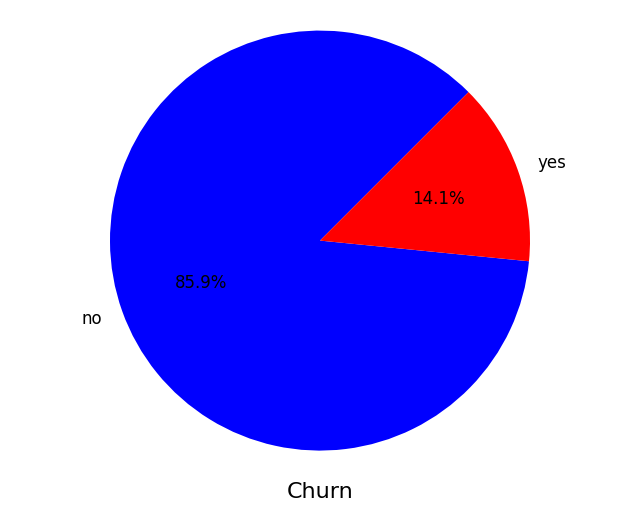

In [89]:
x = df_train[target_variable].value_counts(normalize=True)

plt.figure(figsize = (8,6))
colors = ['blue', 'red']
plt.pie(x, labels = ['no', 'yes'],
        colors= colors,
        autopct= '%1.1f%%',
        startangle=45,
        textprops={'fontsize': 12}
        )

plt.xlabel('Churn', fontsize= 16)
plt.axis('equal')
plt.show()

- Observations :

    Terdapat 14.1% customer churn

### - Univariate Analysis

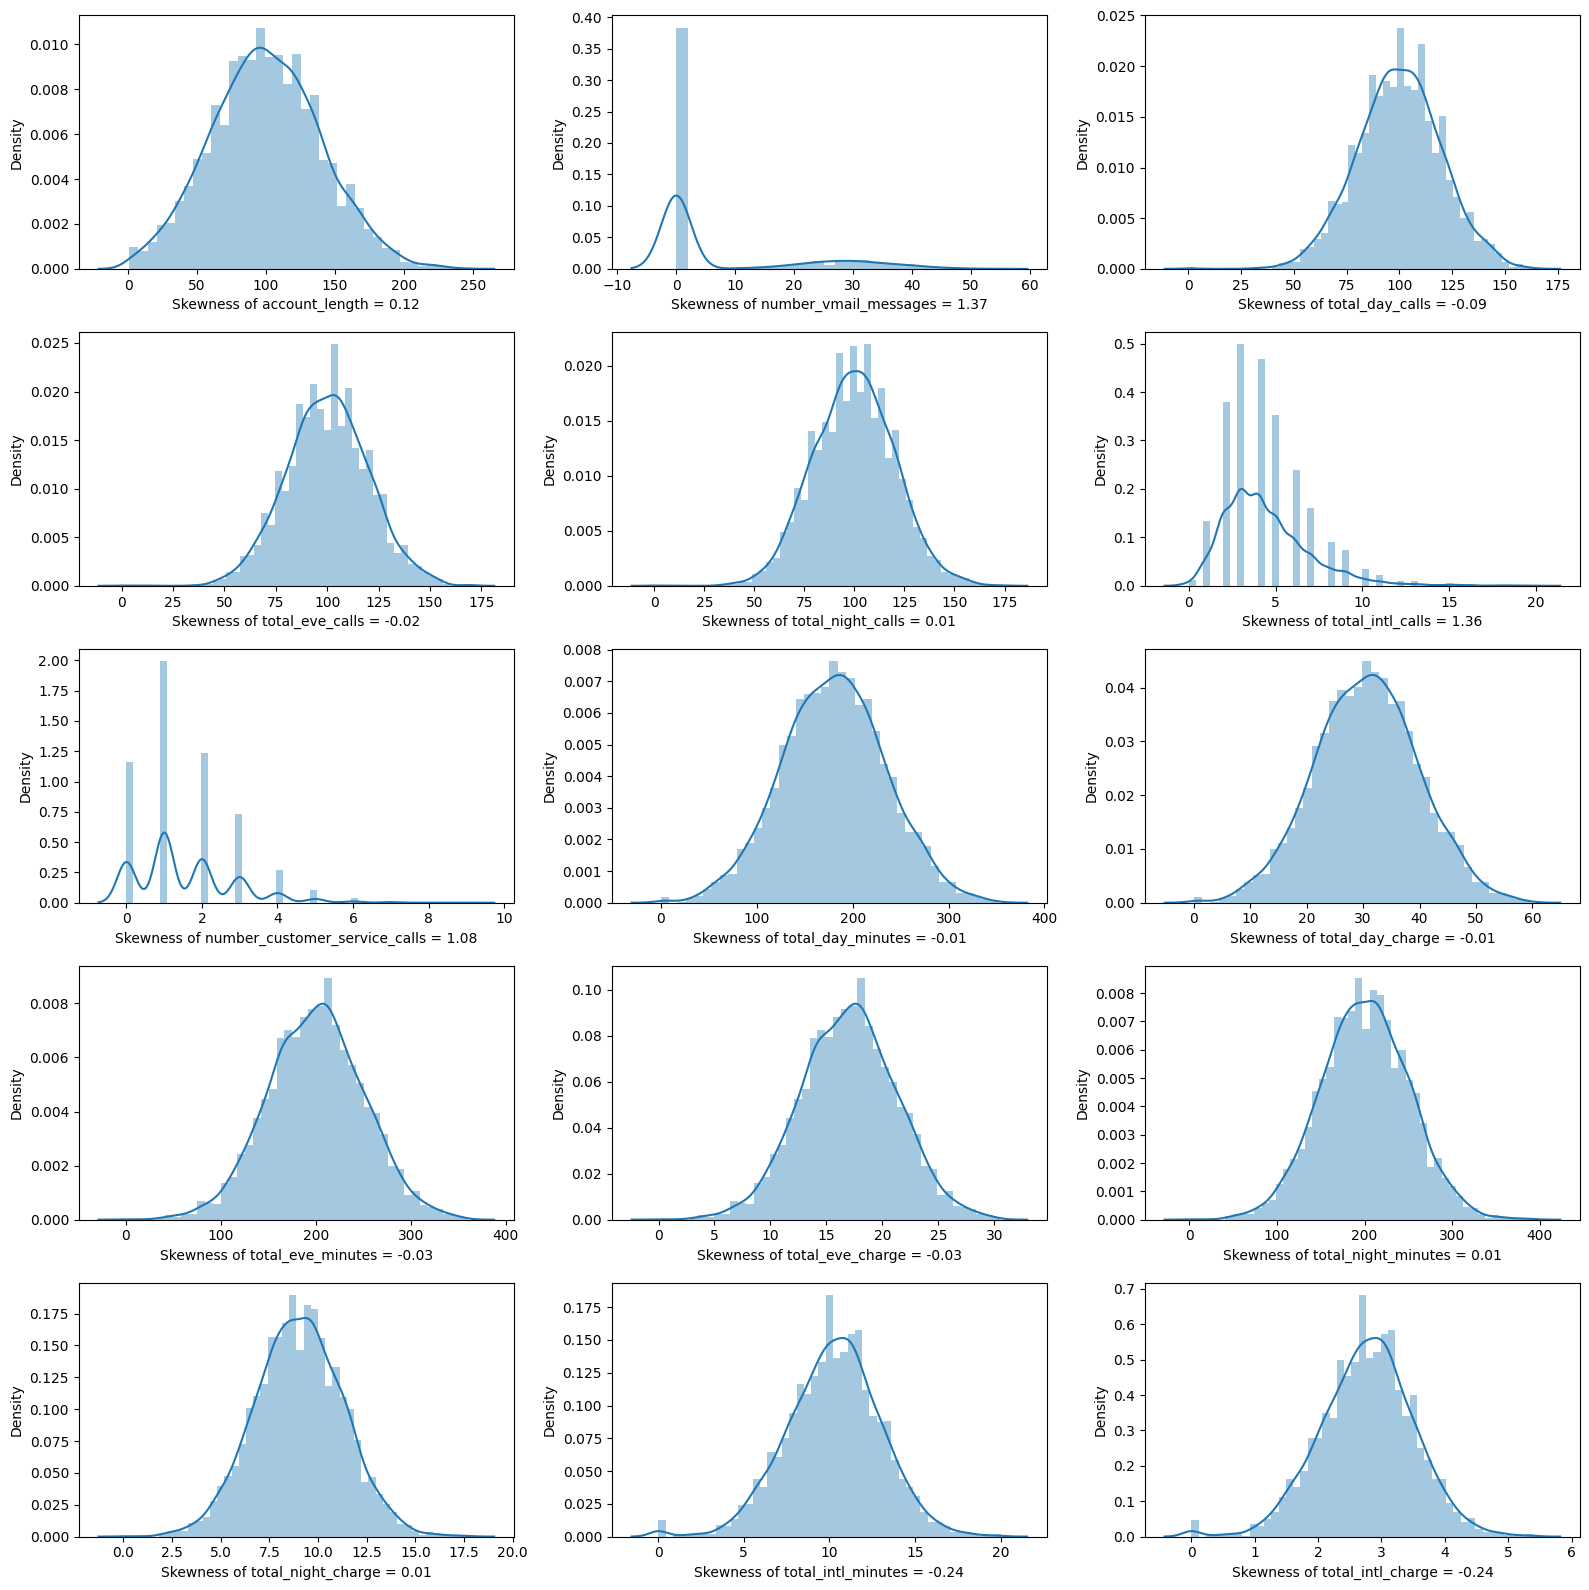

In [90]:
# Numerical 

plt.figure(figsize= (16, 16))
skewness = round((df_train[numerical_col].skew()),2)

for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.distplot(df_train, x=df_train[numerical_col[i]])
    plt.xlabel(f'Skewness of {numerical_col[i]} = {skewness[i]}')
    plt.tight_layout()

- Observations :

    1. Berdasarkan nilai skewness dari hampir semua feature dapat dikatakan semua feature memiliki distribusi data yang normal karena nilai skewness masih berada direntang -2 sampai 2.
    2. Berdasarkan visualisasi diatas feature **number_vmail_messages**, **total_intl_calls**, dan **number_cusotmer_service_calls** memiliki distribusi yang tidak normal.

In [91]:
# Categorical

for i in categorical_col:
  fig = px.histogram(df_train, x=i, width=800, height=600, barmode="group")
  fig.show()
    

- Observations :

    Berdasarkan visualisasi diatas dapat diambil kesimpulan
    1. **state** yang memiliki jumlah customer tertinggi yaitu **WV**.
    2. **area_code** yang mimiliki jumlah customer tertinggi yaitu **area_code_415**.
    3. Jumlah customer tidak memiliki **international plan** lebih tinggi dibanding yang memilki.
    4. Jumlah yang tidak memiliki **voice mail plan** lebih tinggi dari customer yan tidak memiliki.
    5. Jumlah customer yang  **tidak churn** lebih tinggi dari yang **churn**.

### - Bivariate Analysis

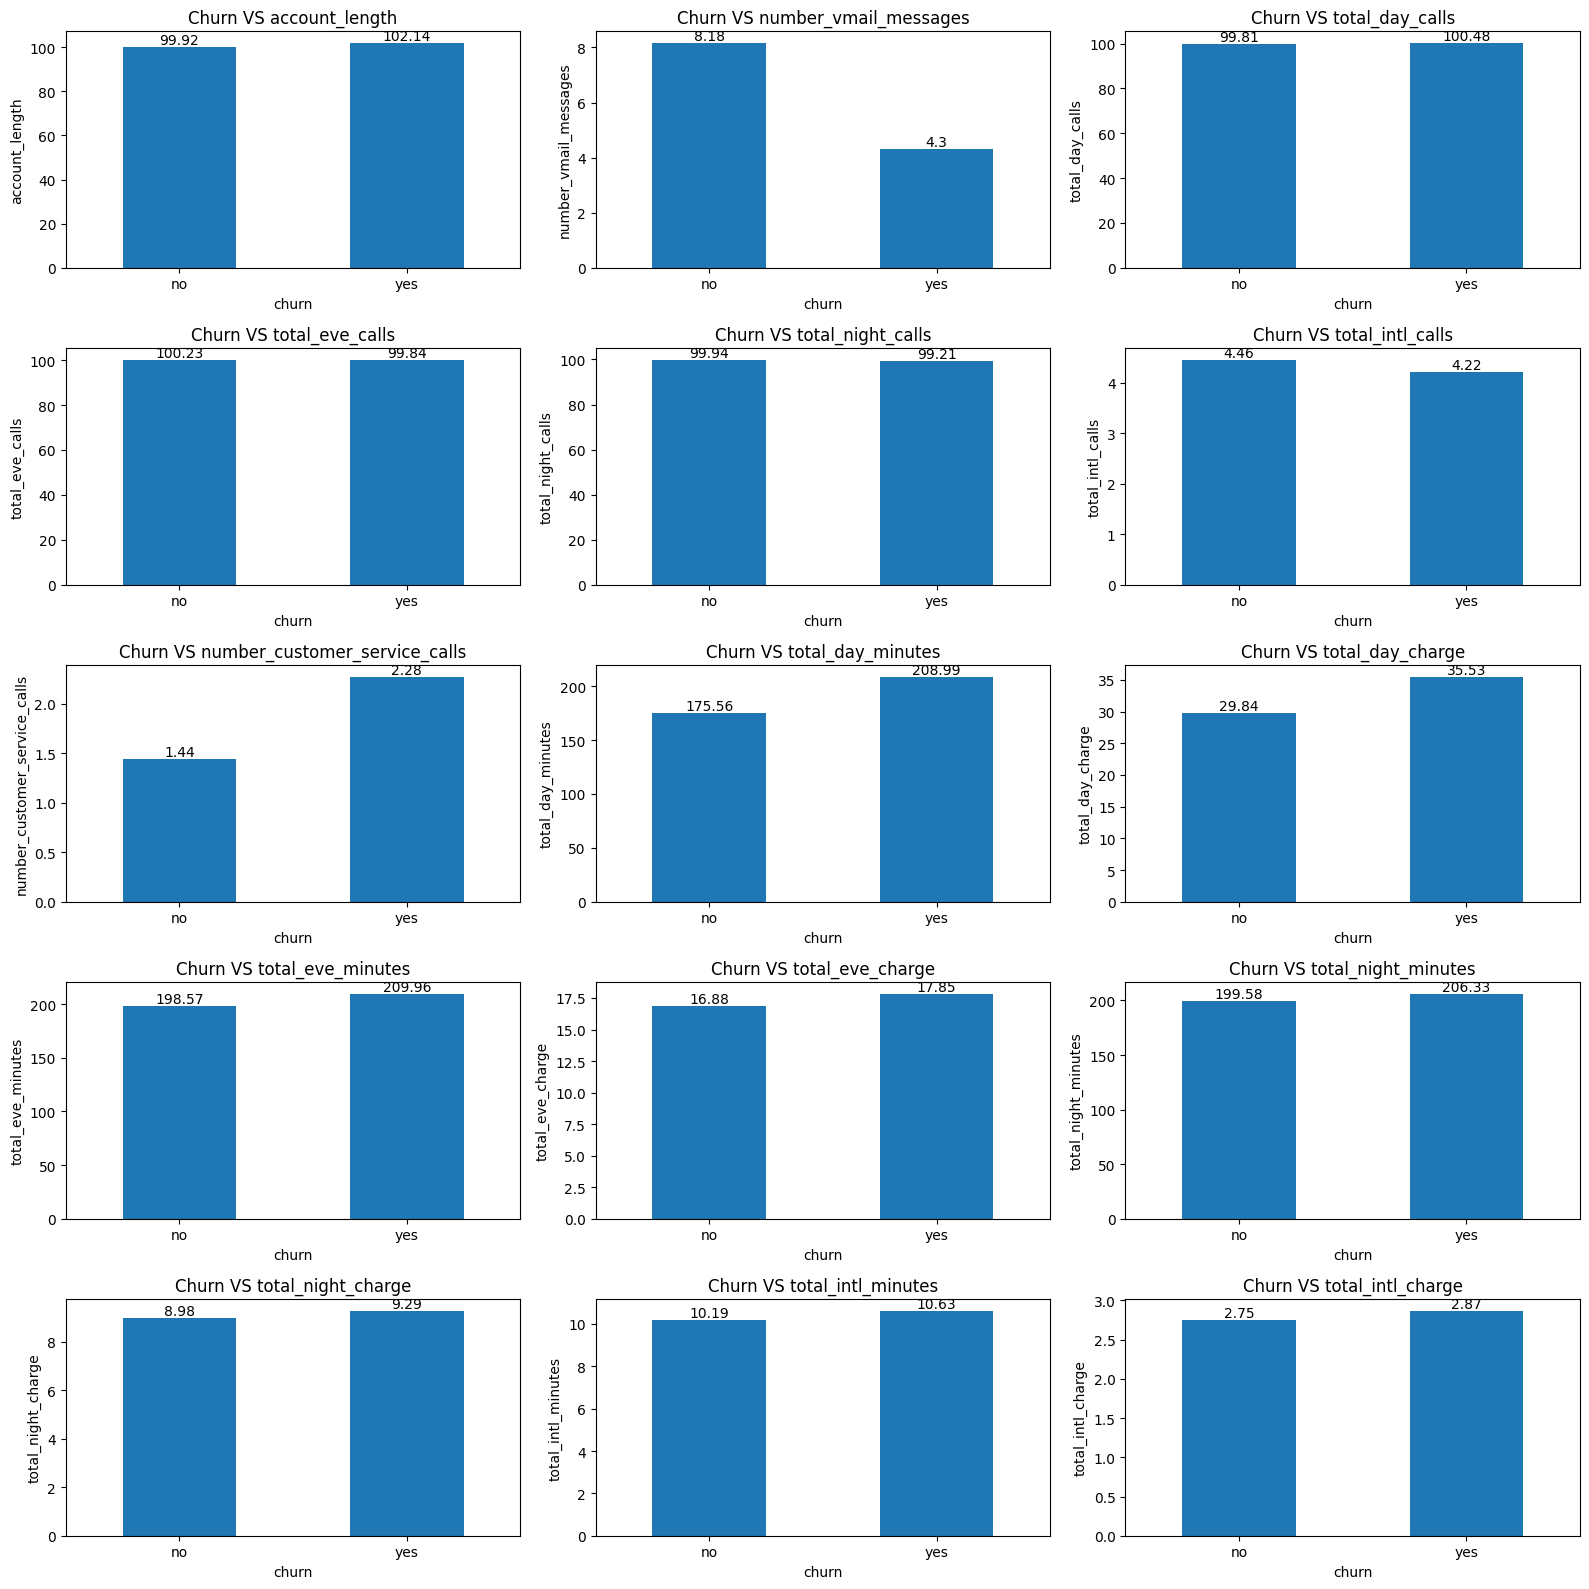

In [92]:
# Numerical Bivariate Analysis
    
plt.figure(figsize= (16, 16))
    
for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    x = df_train.groupby([target_variable])[numerical_col[i]].mean().plot(kind="bar")
    x_label = round(df_train.groupby([target_variable])[numerical_col[i]].mean(), 2)
    x.bar_label(container=x.containers[0], labels= x_label)
    plt.title(f'Churn VS {numerical_col[i]}', fontsize=12)
    plt.ylabel(numerical_col[i])
    plt.xlabel(target_variable)
    plt.xticks(rotation=0)
    plt.tight_layout()


In [93]:
def annova_test (x) :
    churn_yes = df_train[df_train['churn']=='yes'][x]
    churn_no  = df_train[df_train['churn']=='no'][x]

    alpha = 0.05
    ftest,p_value = f_oneway(churn_yes,churn_no)

    if p_value < alpha :
        print(x)
        print(f'Kesimpulan : nilai p_value {p_value} kurang dari alpha {alpha}, nilai ftest = {ftest}')
        print('Terdapat perbedaan target yang signifikan dari segi predictor')
        print()

    else :
        print(x)
        print(f'Kesimpulan : nilai p_value {p_value} lebih dari alpha {alpha}, nilai ftest = {ftest}')
        print('Tidak terdapat perbedaan target yang signifikan dari segi predictor')
        print()

In [94]:
for i in numerical_col:
    annova_test(i)

account_length
Kesimpulan : nilai p_value 0.20656404062166697 lebih dari alpha 0.05, nilai ftest = 1.595833166913361
Tidak terdapat perbedaan target yang signifikan dari segi predictor

number_vmail_messages
Kesimpulan : nilai p_value 5.51138093433281e-11 kurang dari alpha 0.05, nilai ftest = 43.21002028787965
Terdapat perbedaan target yang signifikan dari segi predictor

total_day_calls
Kesimpulan : nilai p_value 0.4480528815932068 lebih dari alpha 0.05, nilai ftest = 0.5756795824705461
Tidak terdapat perbedaan target yang signifikan dari segi predictor

total_eve_calls
Kesimpulan : nilai p_value 0.656849289660532 lebih dari alpha 0.05, nilai ftest = 0.1974013148079506
Tidak terdapat perbedaan target yang signifikan dari segi predictor

total_night_calls
Kesimpulan : nilai p_value 0.407859161275097 lebih dari alpha 0.05, nilai ftest = 0.6851684051609543
Tidak terdapat perbedaan target yang signifikan dari segi predictor

total_intl_calls
Kesimpulan : nilai p_value 0.02520058234323096 

- Observations:

    Berdasarkan visualisasi dan uji anova dapat disimpulkan bawhwa feature **account_length**, **total_day_calls**, **total_eve_calls**, **total_night_calls** tidak menunjukan perbedaan yang signifikan terhadap feature target.

In [95]:
# Categorical Bivariate Analysis

for i in categorical_col:
    if i != target_variable:
        fig = px.histogram(df_train, x=i, width=800, height=600, color= target_variable, barmode="group")
        fig.show()

In [96]:
def chi_test (x,y) :
    
    obs_x = pd.crosstab(df_train[x],df_train[y])
    chi2, p, dof, expected = chi2_contingency(obs_x)
    alpha = 0.05

    
    if p<alpha :
        print (f'===== {x} =====')
        print('Number Expected :')
        print(expected)
        print()
        print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nVariabel 1 dan Variabel 2 adalah variabel dependent')
        print()
        
    else : 
        print (f'===== {x} =====')
        print('Number Expected :')
        print(expected)
        print()
        print (f'Chi-square Statistic : {chi2} ,p-value: {p} lebih dari {alpha} \nVariabel 1 dan Variabel 2 adalah variabel independent')
        print()

In [97]:
# Chi_squared test statistic for categorical

for i in categorical_col:
    if i != target_variable:
        chi_test(i, target_variable)

===== state =====
Number Expected :
[[ 52.41694118   8.58305882]
 [ 86.78870588  14.21129412]
 [ 61.00988235   9.99011765]
 [ 66.16564706  10.83435294]
 [ 33.51247059   5.48752941]
 [ 68.74352941  11.25647059]
 [ 75.61788235  12.38211765]
 [ 61.86917647  10.13082353]
 [ 68.74352941  11.25647059]
 [ 65.30635294  10.69364706]
 [ 54.99482353   9.00517647]
 [ 66.16564706  10.83435294]
 [ 53.27623529   8.72376471]
 [ 91.08517647  14.91482353]
 [ 67.88423529  11.11576471]
 [ 71.32141176  11.67858824]
 [ 74.75858824  12.24141176]
 [ 73.04        11.96      ]
 [ 59.29129412   9.70870588]
 [ 76.47717647  12.52282353]
 [ 73.89929412  12.10070588]
 [ 76.47717647  12.52282353]
 [ 74.75858824  12.24141176]
 [ 92.80376471  15.19623529]
 [ 68.74352941  11.25647059]
 [ 70.46211765  11.53788235]
 [ 68.74352941  11.25647059]
 [ 68.74352941  11.25647059]
 [ 57.57270588   9.42729412]
 [ 62.72847059  10.27152941]
 [ 67.02494118  10.97505882]
 [ 82.49223529  13.50776471]
 [ 67.02494118  10.97505882]
 [ 71.3

- Observartions:

    Berdasarkan visualisasi diatas dapat disimpulkan
    1. **state** dengan customer churn tertinggi ada pada **NJ**.
    2. **area_code** dengan customer churn tertinggi adalah **area_code_415**.
    3. Customer yang tidak memiliki **international_plan** memiliki jumlah churn yang lebih tinggi dibanding dengan customer yang memiliki **international_plan**.
    4. Customer yang tidak memiliki **voice_mail_plan** memiliki jumlah churn yang lebih tinggi dibanding dengan customer yang memiliki **voice_mail_plan**.
    5. Hasil uji chi-square terhadap feature categorical menunjukan feature target dan **state**, **international_plan**, **voice_mail_plan** merupakan feature yang dependent. Sedangkan feature **area_code** merupakan feature independent.

### - Correlation Analysis

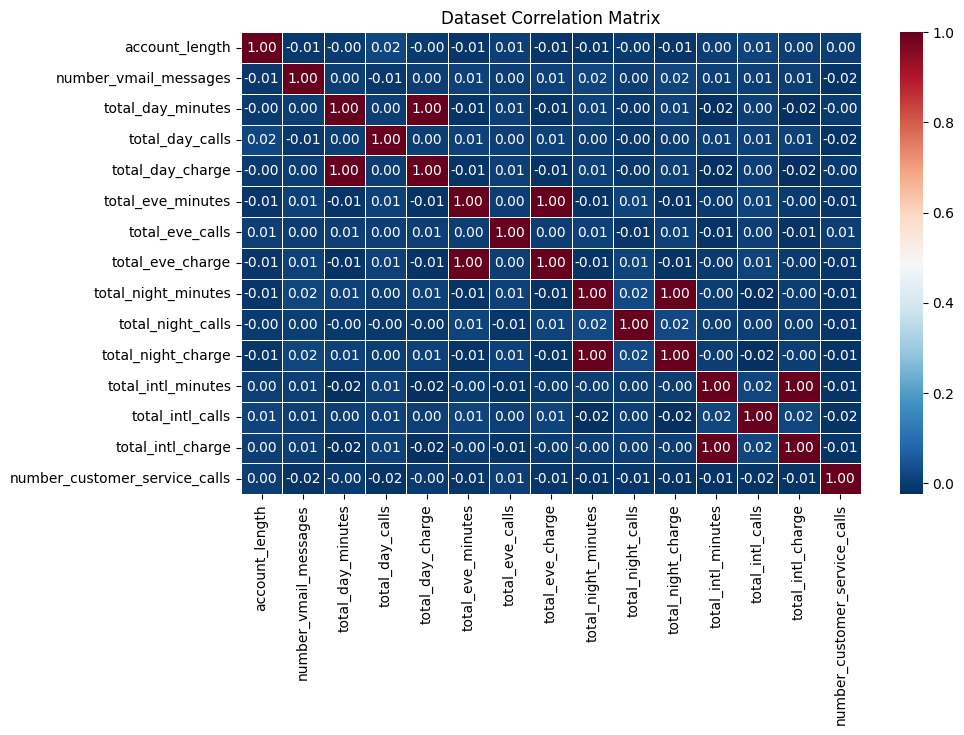

In [98]:
fig, ax = plt.subplots(figsize=[10,6])

sns.heatmap(df_train.corr(), annot= True, linewidths= .5, fmt= '.2f', ax= ax, cmap= 'RdBu_r')
ax.set_title('Dataset Correlation Matrix')
plt.show()

- Observations:

    Visualisasi diatas dapat menunjukan korelasi antar variabel numerical, dimana dapat dilihat dari grafik heatmap diatas dimana variabel total minutes dan total charge memiliki korelasi.

## 3. Data Preprocessing

### - Check Oulier

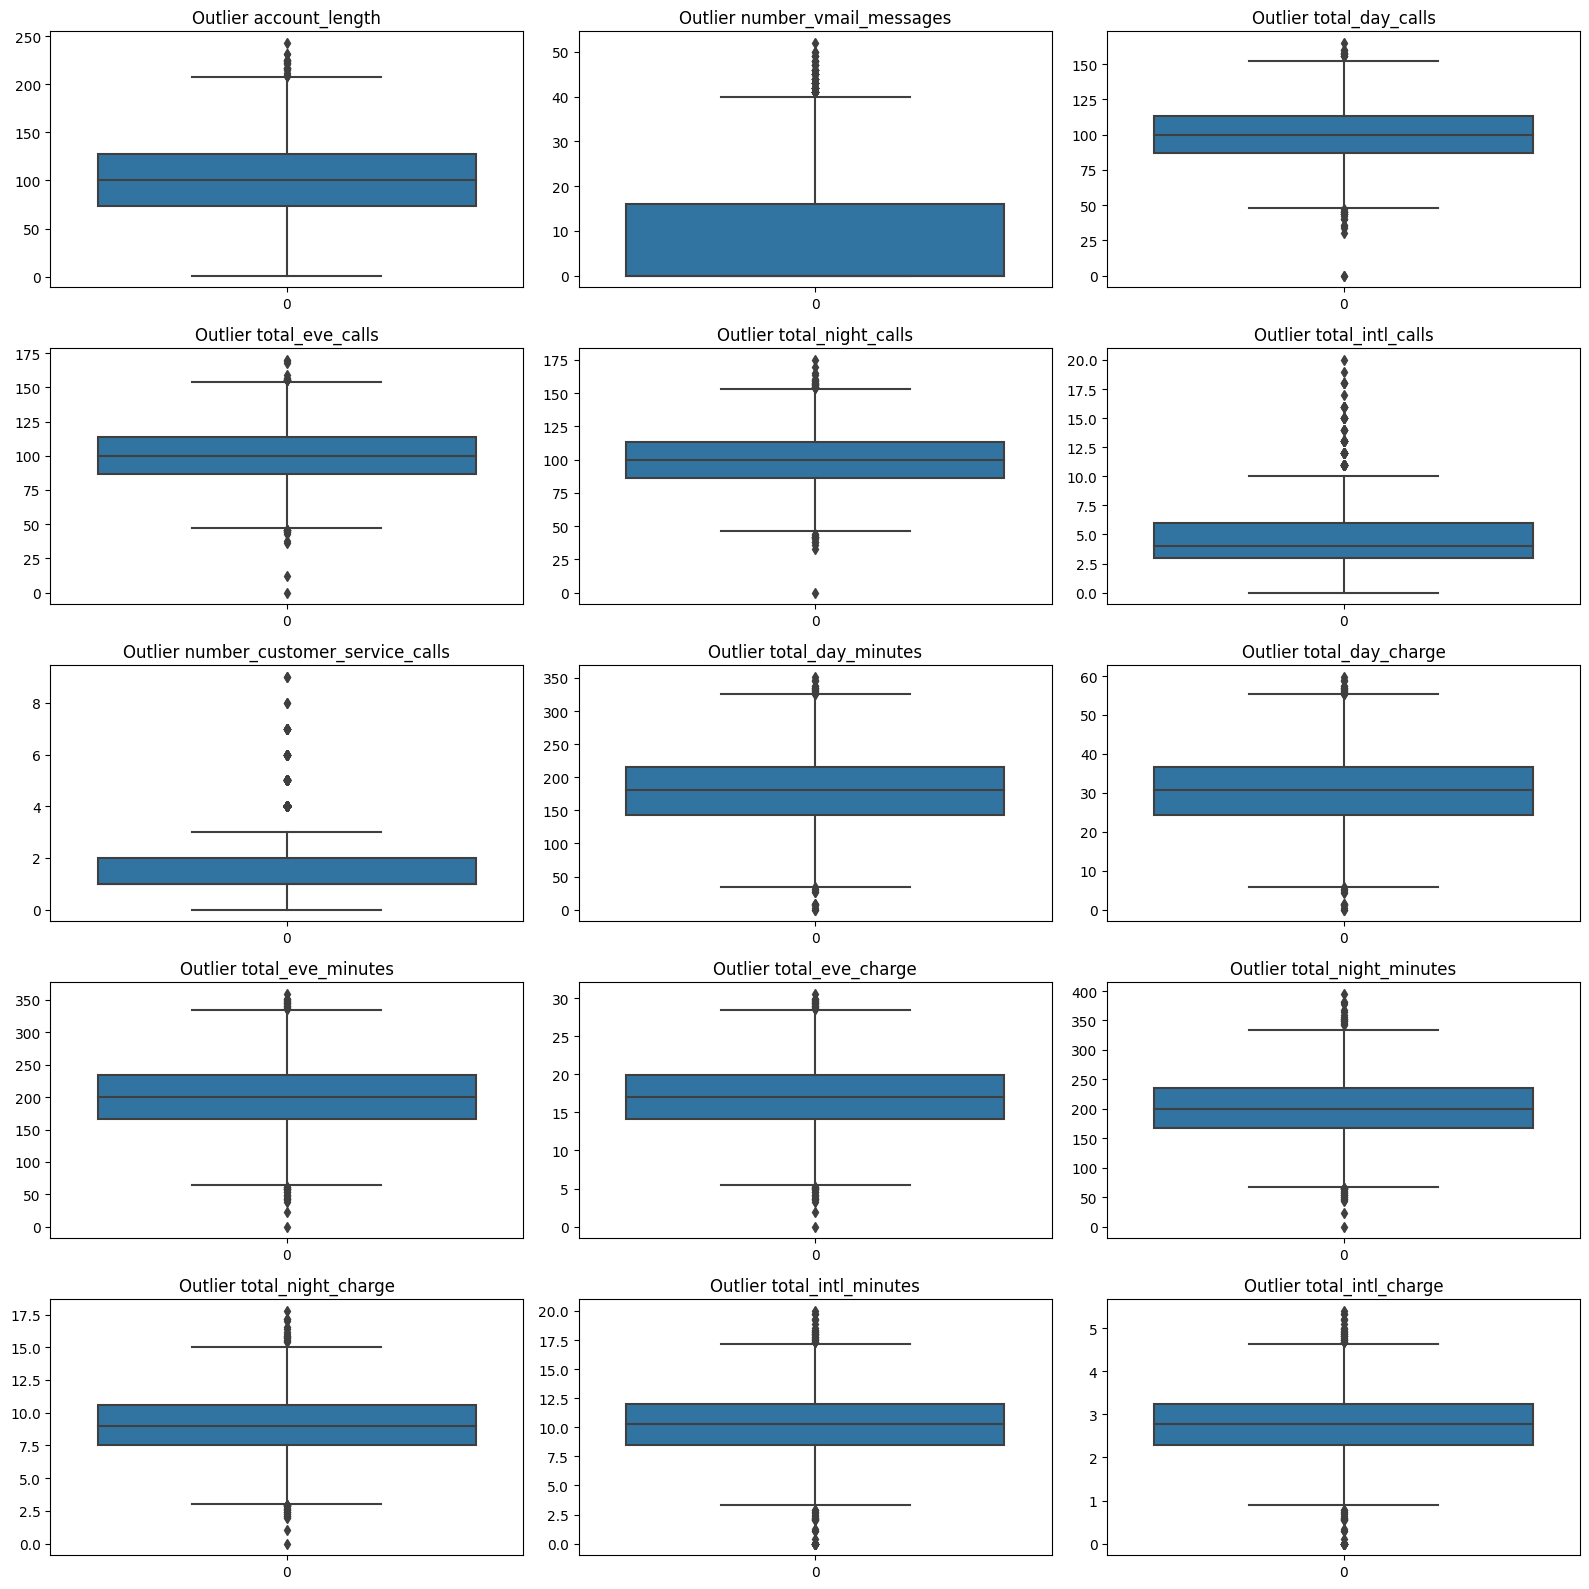

In [99]:
# Outlier df_train

plt.figure(figsize= (16, 16)) 
   
for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(df_train[numerical_col[i]])
    plt.title(f'Outlier {numerical_col[i]}', fontsize=12)
    plt.tight_layout()

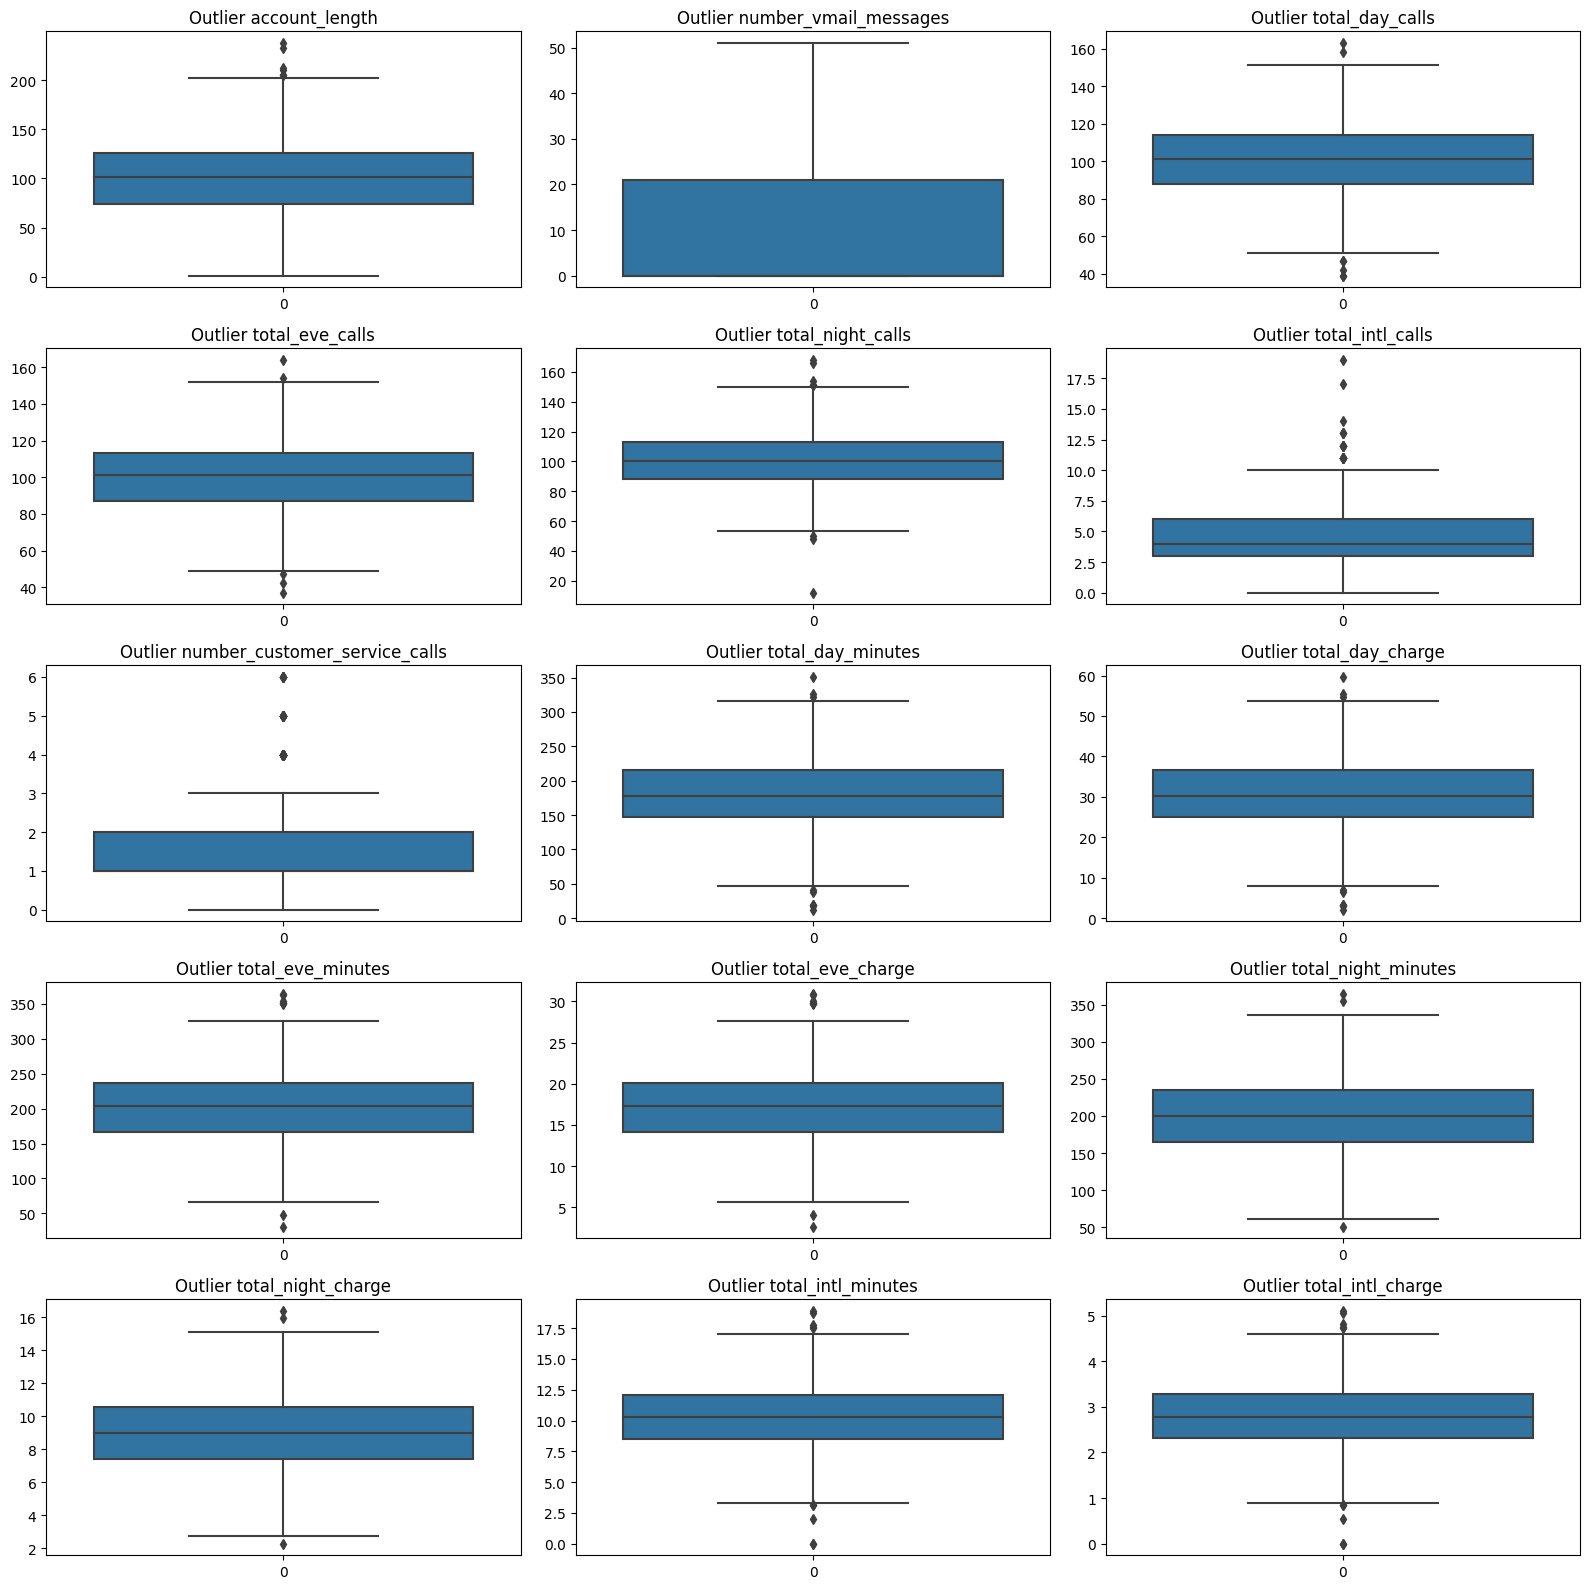

In [100]:
# Outlier df_test

plt.figure(figsize= (16, 16))
    
for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(df_test[numerical_col[i]])
    plt.title(f'Outlier {numerical_col[i]}', fontsize=12)
    plt.tight_layout()

In [101]:
dict = {}
for col in numerical_col:
    percentile25 = df_train[col].quantile(0.25)
    percentile75 = df_train[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + (1.5 * IQR) 
    lower_limit = percentile25 - (1.5 * IQR)
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In [102]:
dict

{'upper_limit_account_length': 208.0,
 'lower_limit_account_length': -8.0,
 'upper_limit_number_vmail_messages': 40.0,
 'lower_limit_number_vmail_messages': -24.0,
 'upper_limit_total_day_calls': 152.0,
 'lower_limit_total_day_calls': 48.0,
 'upper_limit_total_eve_calls': 154.5,
 'lower_limit_total_eve_calls': 46.5,
 'upper_limit_total_night_calls': 153.5,
 'lower_limit_total_night_calls': 45.5,
 'upper_limit_total_intl_calls': 10.5,
 'lower_limit_total_intl_calls': -1.5,
 'upper_limit_number_customer_service_calls': 3.5,
 'lower_limit_number_customer_service_calls': -0.5,
 'upper_limit_total_day_minutes': 325.51249999999993,
 'lower_limit_total_day_minutes': 34.01250000000006,
 'upper_limit_total_day_charge': 55.3275,
 'lower_limit_total_day_charge': 5.787499999999998,
 'upper_limit_total_eve_minutes': 335.55,
 'lower_limit_total_eve_minutes': 64.15000000000002,
 'upper_limit_total_eve_charge': 28.515,
 'lower_limit_total_eve_charge': 5.454999999999998,
 'upper_limit_total_night_minut

In [103]:
for col in numerical_col:
    df_train[col] = np.where(
        df_train[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df_train[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df_train[col]  
        )
    )

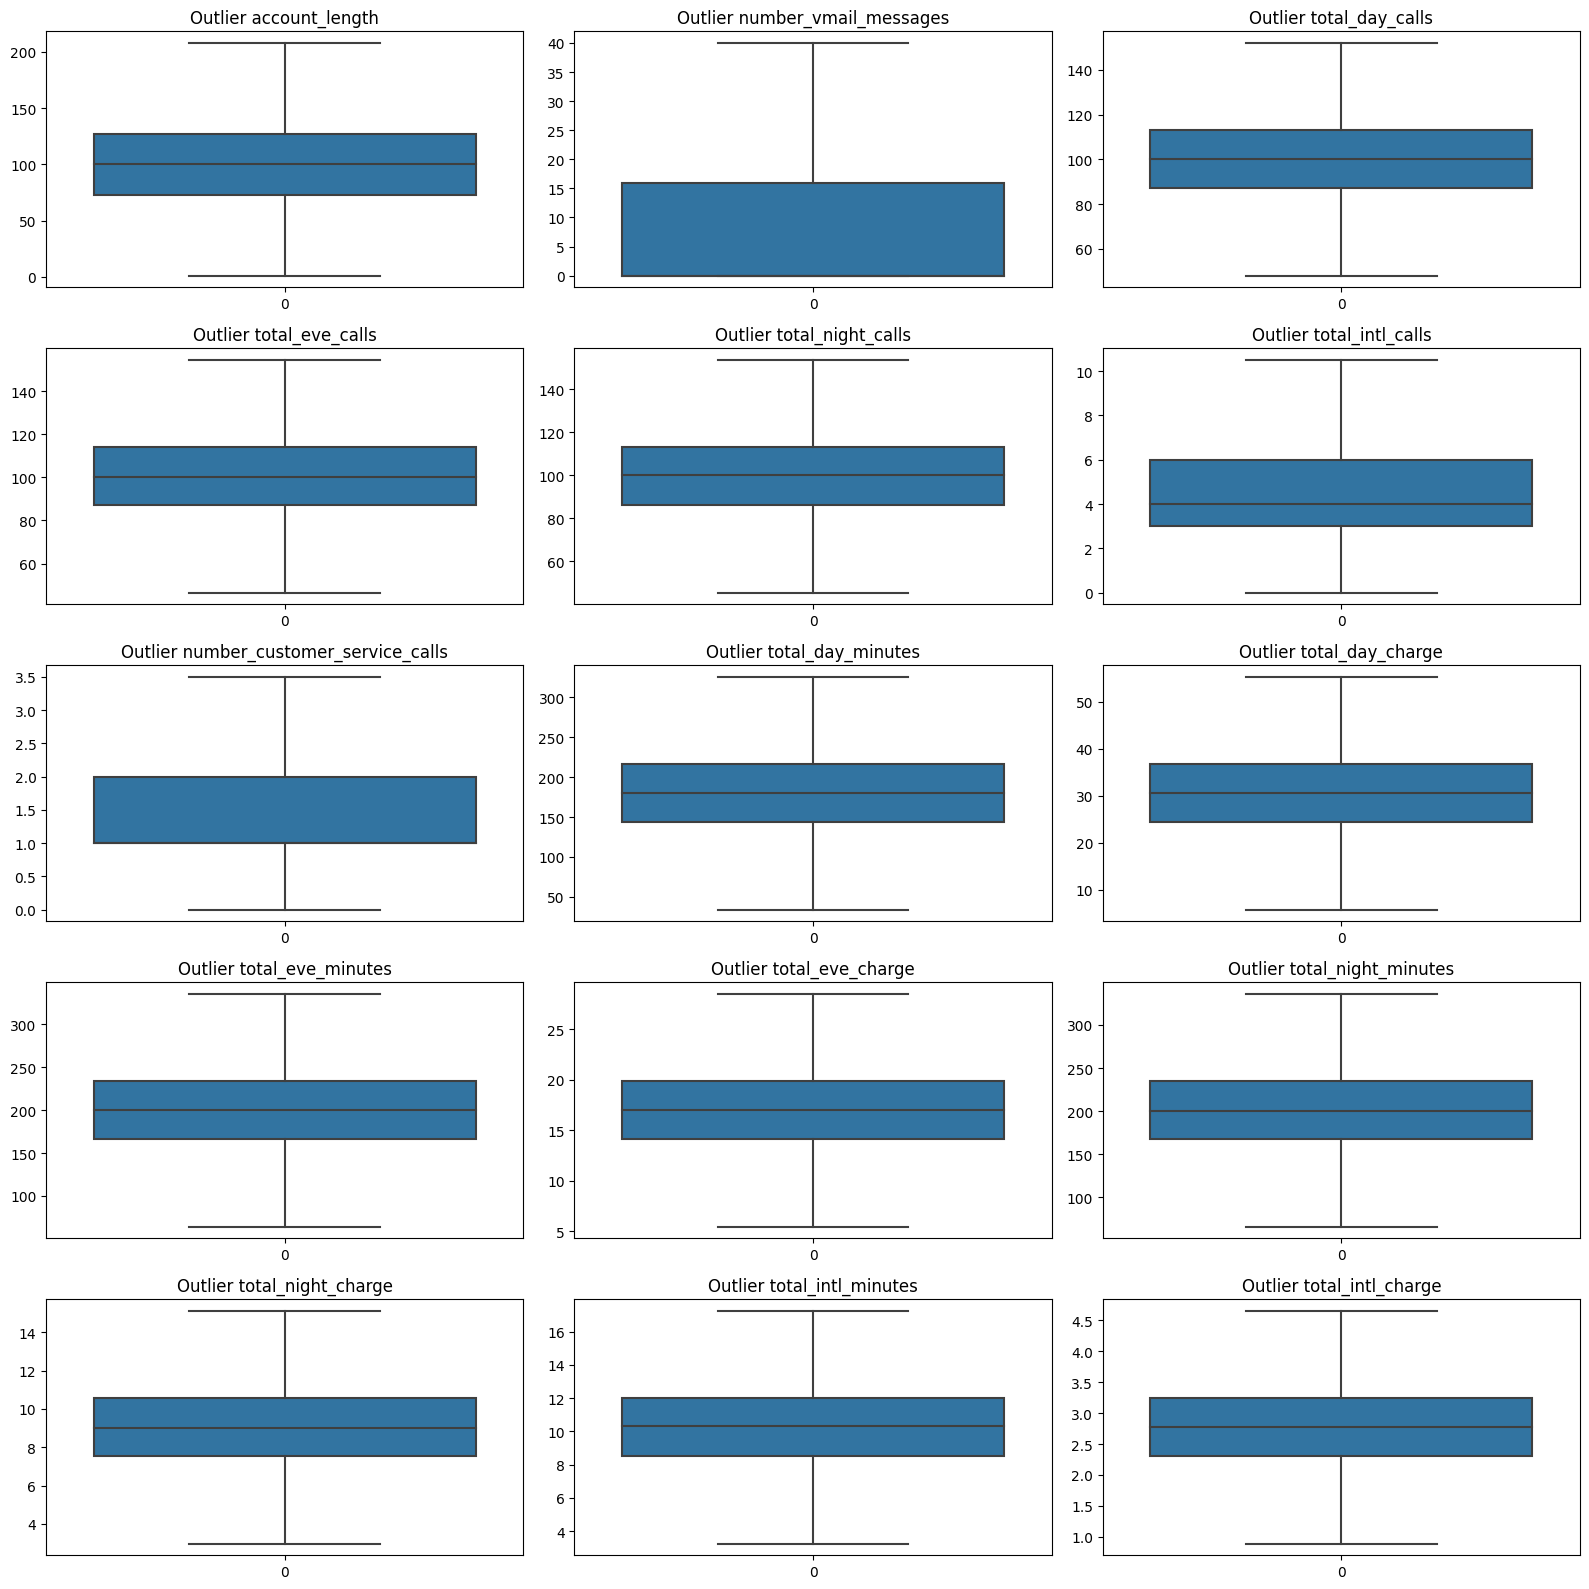

In [104]:
# After treatment Oulier df_train1

plt.figure(figsize= (16, 16)) 
   
for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(df_train[numerical_col[i]])
    plt.title(f'Outlier {numerical_col[i]}', fontsize=12)
    plt.tight_layout()

In [105]:
dict = {}
for col in numerical_col:
    percentile25 = df_test[col].quantile(0.25)
    percentile75 = df_test[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In [106]:
dict

{'upper_limit_account_length': 204.0,
 'lower_limit_account_length': -4.0,
 'upper_limit_number_vmail_messages': 52.5,
 'lower_limit_number_vmail_messages': -31.5,
 'upper_limit_total_day_calls': 153.0,
 'lower_limit_total_day_calls': 49.0,
 'upper_limit_total_eve_calls': 152.0,
 'lower_limit_total_eve_calls': 48.0,
 'upper_limit_total_night_calls': 150.5,
 'lower_limit_total_night_calls': 50.5,
 'upper_limit_total_intl_calls': 10.5,
 'lower_limit_total_intl_calls': -1.5,
 'upper_limit_number_customer_service_calls': 3.5,
 'lower_limit_number_customer_service_calls': -0.5,
 'upper_limit_total_day_minutes': 320.0,
 'lower_limit_total_day_minutes': 42.60000000000001,
 'upper_limit_total_day_charge': 54.400000000000006,
 'lower_limit_total_day_charge': 7.239999999999998,
 'upper_limit_total_eve_minutes': 339.7375,
 'lower_limit_total_eve_minutes': 63.037499999999966,
 'upper_limit_total_eve_charge': 28.877499999999994,
 'lower_limit_total_eve_charge': 5.3575000000000035,
 'upper_limit_tot

In [107]:
for col in numerical_col:
    df_test[col] = np.where(
        df_test[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df_test[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df_test[col]  
        )
    )

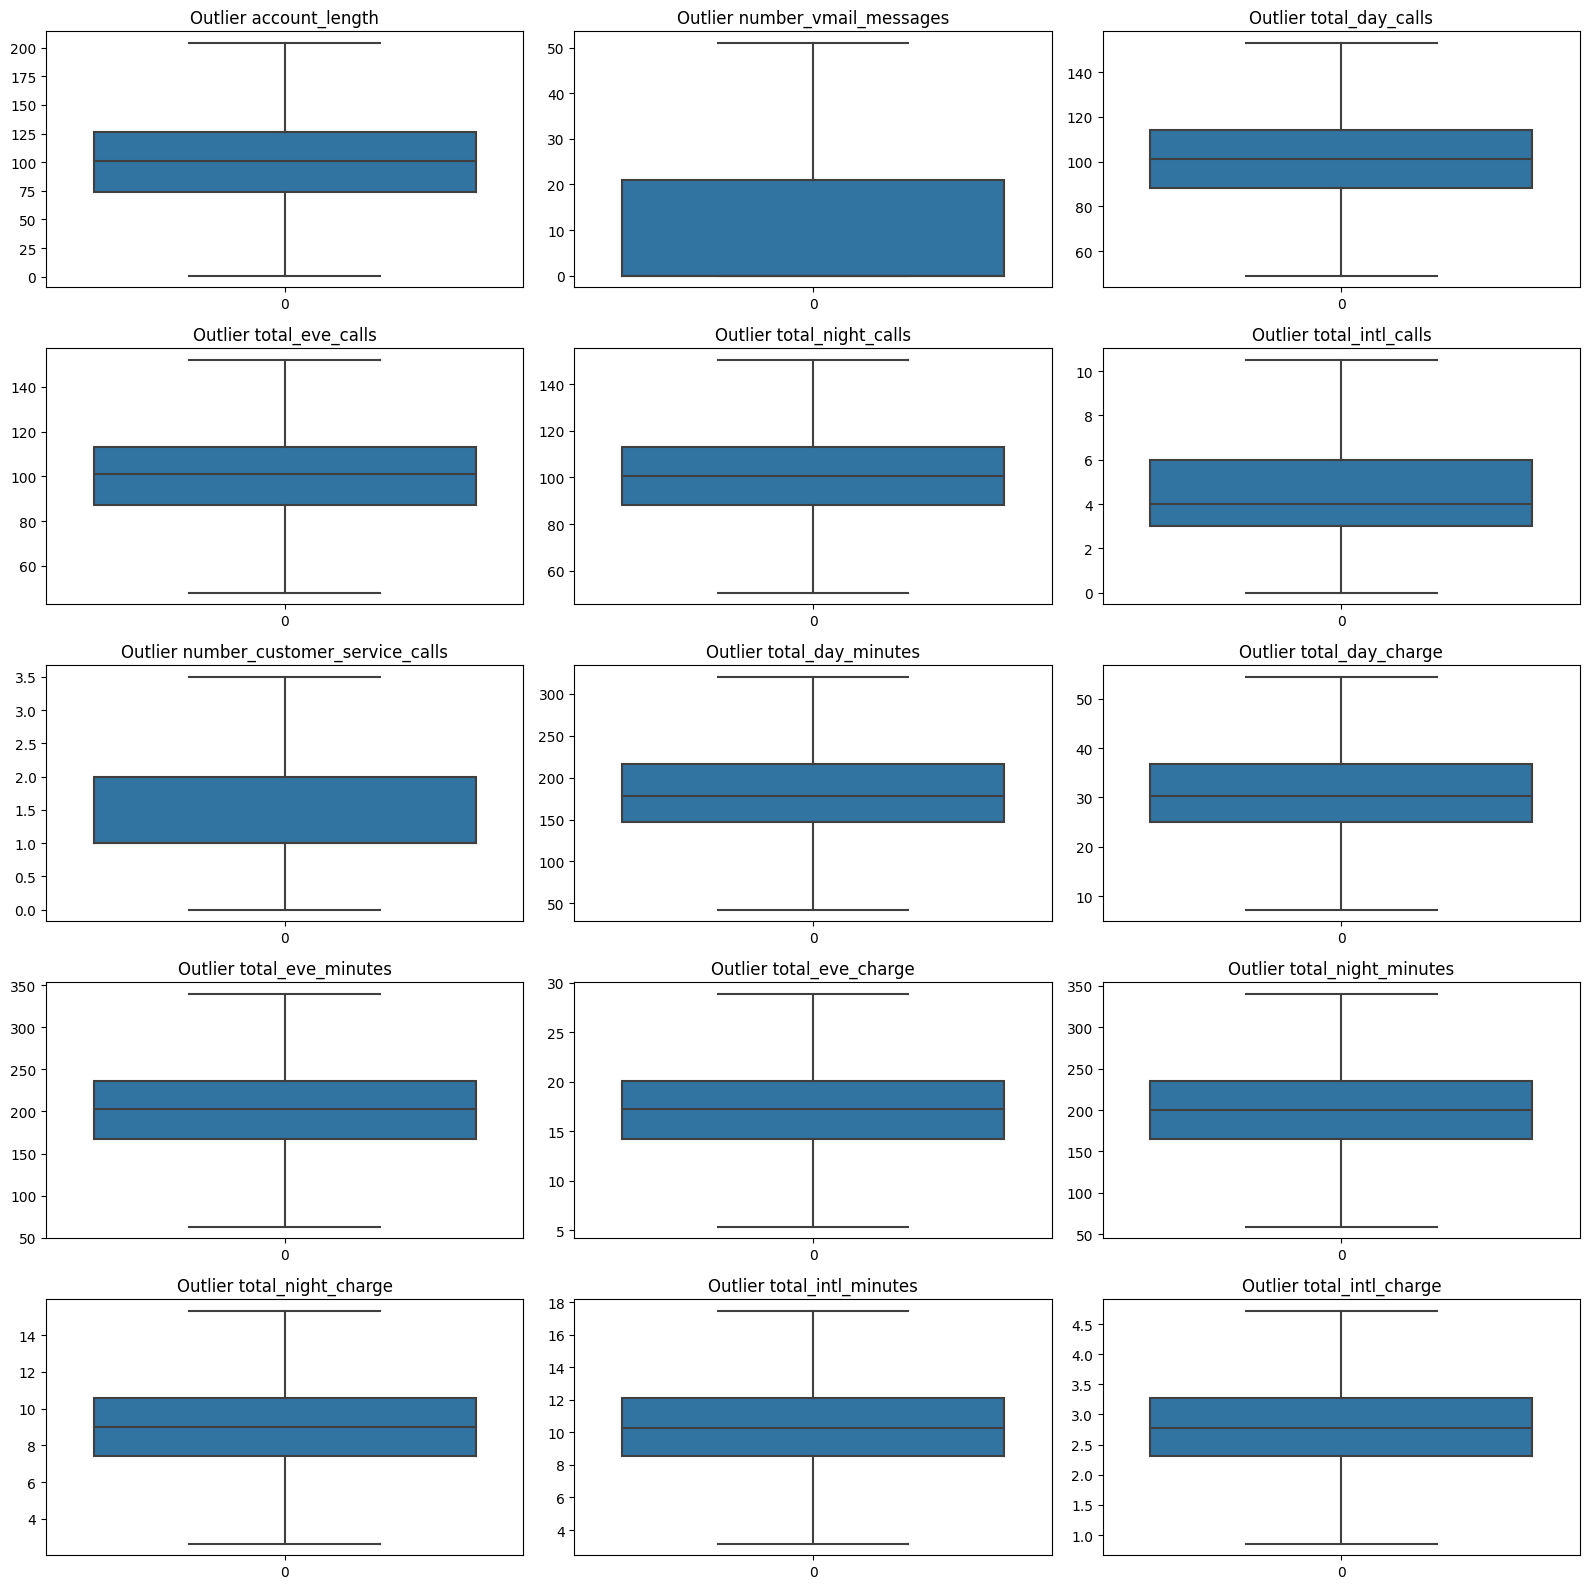

In [108]:
# After Outlier treatment df_test1

plt.figure(figsize= (16, 16))
    
for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(df_test[numerical_col[i]])
    plt.title(f'Outlier {numerical_col[i]}', fontsize=12)
    plt.tight_layout()

- Observations:
    
    Terdapat outlier pada kedua dataset train.csv dan test.csv, maka dilakukan handling dengan cara menghapus outlier yang ada.

### - Normalization

In [109]:

def normalize(data):
    scaler = MinMaxScaler()
    X_transform = scaler.fit_transform(data[numerical_col])
    X_transform = pd.DataFrame(X_transform, columns= numerical_col)
    
    return X_transform

In [110]:
dftrain_normalized = normalize(df_train)
dftest_normalized = normalize(df_test)

In [111]:
dftrain_normalized.head()

,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge
0,0.512077,0.65,0.721154,0.523148,0.532407,0.285714,0.285714,0.437693,0.437677,0.483972,0.484172,0.697990,0.698251,0.746429,0.747340
1,0.657005,0.00,0.634615,0.587963,0.541667,0.476190,0.000000,0.718310,0.718460,0.210206,0.210104,0.357864,0.358333,0.639286,0.638298
2,0.400966,0.00,0.221154,0.384259,0.402778,0.666667,0.571429,0.910420,0.910628,0.000000,0.000000,0.484948,0.485082,0.239286,0.236702
3,0.357488,0.00,0.625000,0.699074,0.699074,0.285714,0.857143,0.455189,0.455238,0.310059,0.310278,0.447897,0.448045,0.489286,0.489362
4,0.579710,0.60,0.384615,0.569444,0.671296,0.666667,0.857143,0.631861,0.631863,1.000000,1.000000,0.543118,0.543519,0.303571,0.303191


### - Feature Engineering

- Replace Object to Numeric

            Merubah feature pada kolom categoric

In [112]:
# Function to change object column to numeric column

def object_to_numeric(data):
    for col in data:
        data[col].replace(['no','yes'],[0,1],inplace = True)
   
    return data

In [113]:
dftrain_encode = object_to_numeric(df_train[categorical_col])

categorical_test = categorical(df_test)
dftest_encode = object_to_numeric(df_test[categorical_test])

In [114]:
dftrain_encode

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,0,1,0
1,NJ,area_code_415,0,0,0
2,OH,area_code_408,1,0,0
3,OK,area_code_415,1,0,0
4,MA,area_code_510,0,1,0
...,...,...,...,...,...
4245,MT,area_code_415,0,0,0
4246,WV,area_code_408,0,0,0
4247,NC,area_code_408,0,0,0
4248,HI,area_code_408,0,1,0


In [115]:
new_dftrain = pd.concat([dftrain_encode, dftrain_normalized], axis= 1)
new_dftest = pd.concat([dftest_encode, dftest_normalized], axis= 1)

In [116]:
new_dftrain.head()

,state,area_code,international_plan,voice_mail_plan,churn,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge
0,OH,area_code_415,0,1,0,0.512077,0.65,0.721154,0.523148,0.532407,0.285714,0.285714,0.437693,0.437677,0.483972,0.484172,0.697990,0.698251,0.746429,0.747340
1,NJ,area_code_415,0,0,0,0.657005,0.00,0.634615,0.587963,0.541667,0.476190,0.000000,0.718310,0.718460,0.210206,0.210104,0.357864,0.358333,0.639286,0.638298
2,OH,area_code_408,1,0,0,0.400966,0.00,0.221154,0.384259,0.402778,0.666667,0.571429,0.910420,0.910628,0.000000,0.000000,0.484948,0.485082,0.239286,0.236702
3,OK,area_code_415,1,0,0,0.357488,0.00,0.625000,0.699074,0.699074,0.285714,0.857143,0.455189,0.455238,0.310059,0.310278,0.447897,0.448045,0.489286,0.489362
4,MA,area_code_510,0,1,0,0.579710,0.60,0.384615,0.569444,0.671296,0.666667,0.857143,0.631861,0.631863,1.000000,1.000000,0.543118,0.543519,0.303571,0.303191


In [117]:
new_dftest.head()

,state,area_code,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge
0,KS,area_code_415,0,1,0.625616,0.490196,0.586538,0.490385,0.405,0.285714,0.285714,0.802091,0.802163,0.485589,0.485651,0.660194,0.660178,0.478147,0.477332
1,AL,area_code_510,1,0,0.576355,0.000000,0.471154,0.509615,0.675,0.571429,0.000000,0.651766,0.651824,0.569434,0.569409,0.515153,0.515514,0.219406,0.218264
2,IA,area_code_415,0,0,0.300493,0.000000,0.201923,0.269231,0.485,0.571429,1.000000,0.281543,0.281595,0.882409,0.882334,0.511953,0.512352,0.694930,0.694948
3,VT,area_code_510,0,0,0.453202,0.000000,0.625000,0.605769,0.705,0.285714,0.857143,0.533886,0.533927,0.560761,0.560906,0.251022,0.250692,0.345280,0.345207
4,NE,area_code_415,0,0,0.852217,0.000000,0.259615,0.615385,0.645,0.476190,0.857143,0.294521,0.294529,0.773627,0.773491,0.681523,0.681522,0.862762,0.863342


        Menghapus kolom yang sudah dijadikan feature baru, dan menghapus kolom yang tidak mempengaruhi feature target

In [118]:
def delete_col(df):
    df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

    df.drop(columns= ['state', 'area_code', 'account_length'], inplace= True)
    df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                    'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                     'total_eve_minutes', 'total_night_minutes'], inplace=True)
            

In [119]:
delete_col(new_dftrain)
delete_col(new_dftest)

In [120]:
new_dftrain.head()

,international_plan,voice_mail_plan,churn,number_vmail_messages,total_intl_calls,number_customer_service_calls,total_intl_minutes,total_intl_charge,total_net_minutes,total_net_calls,total_net_charge
0,0,1,0,0.65,0.285714,0.285714,0.746429,0.747340,1.619655,1.776709,1.620099
1,0,0,0,0.00,0.476190,0.000000,0.639286,0.638298,1.286381,1.764245,1.286897
2,1,0,0,0.00,0.666667,0.571429,0.239286,0.236702,1.395368,1.008191,1.395710
3,1,0,0,0.00,0.285714,0.857143,0.489286,0.489362,1.213145,2.023148,1.213561
4,0,1,0,0.60,0.666667,0.857143,0.303571,0.303191,2.174979,1.625356,2.175382


- Observations:

    1. Merubah data categoric menjadi nilai biner.
    2. Membuat feature total__net_call, total_net_charge, total_net_minutes

### - Train-Test Spliting

In [121]:
X = new_dftrain.drop(target_variable, axis = 1)
X.shape

(4250, 10)

In [122]:
y = new_dftrain[[target_variable]]
y.head()

,churn
0,0
1,0
2,0
3,0
4,0


In [123]:
# Splitting the data

X_train, X_test, y_train,  y_test = train_test_split(X, y)

In [124]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape 

((3187, 10), (3187, 1), (1063, 10), (1063, 1))

In [125]:
y_train.value_counts()

churn
0        2735
1         452
dtype: int64

In [126]:
X_rus, y_rus = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X_train, y_train)
y_rus.value_counts()

churn
0        904
1        452
dtype: int64

In [127]:
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)
y_smote.value_counts()

churn
0        2735
1        2735
dtype: int64

In [128]:
X_smote_test, y_smote_test = SMOTE().fit_resample(X_test, y_test)
y_smote_test.value_counts()

churn
0        917
1        917
dtype: int64

In [129]:
from imblearn.combine import SMOTEENN
X_combine, y_combine = SMOTEENN().fit_resample(X_train, y_train)
y_combine.value_counts()

churn
1        2511
0        2029
dtype: int64

### - Modeling Machine Learning

In [130]:
clf_list = [KNeighborsClassifier(), DecisionTreeClassifier(),
            RandomForestClassifier(), LogisticRegression(), GaussianNB()]

def get_score(model, X, y):
    pred = model.predict(X)
    auc = round(roc_auc_score(y, pred), 2)
    prec = round(precision_score(y, pred), 2)
    rec = round(recall_score(y, pred), 2)
    accu = round(accuracy_score(y, pred),2)
    return auc, prec, rec, accu

train_scores = []
test_scores = []
models = []
for clf in clf_list:
    model = Pipeline([
        
            ('clf', clf)
            
        ]
    )
    model.fit(X_smote, y_smote)
    
    train_score = get_score(model, X_smote, y_smote)
    test_score = get_score(model, X_smote_test, y_smote_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(type(clf).__name__)
    models.append(type(clf).__name__)

KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
LogisticRegression
GaussianNB


In [131]:
df_eval = pd.DataFrame()
df_eval['model'] = models
df_eval['train_auc'] = [x[0] for x in train_scores]
df_eval['train_precision'] = [x[1] for x in train_scores]
df_eval['train_recall'] = [x[2] for x in train_scores]
df_eval['train_accuracy'] = [x[3] for x in train_scores]
df_eval['test_auc'] = [x[0] for x in test_scores]
df_eval['test_precision'] = [x[1] for x in test_scores]
df_eval['test_recall'] = [x[2] for x in test_scores]
df_eval['test_accuracy'] = [x[3] for x in test_scores]
display(df_eval.sort_values('train_accuracy', ascending= False))

,model,train_auc,train_precision,train_recall,train_accuracy,test_auc,test_precision,test_recall,test_accuracy
1,DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.81,0.87,0.74,0.81
2,RandomForestClassifier,1.00,1.00,1.00,1.00,0.84,0.92,0.75,0.84
0,KNeighborsClassifier,0.93,0.88,0.99,0.93,0.77,0.80,0.73,0.77
4,GaussianNB,0.78,0.79,0.76,0.78,0.76,0.78,0.73,0.76
3,LogisticRegression,0.74,0.75,0.73,0.74,0.72,0.73,0.69,0.72


- Observations :

    1. Dari hasil diatas dapat dilihat bahwa nilai Accuracy tertinggi adalah model Decision Tree, akan tetapi dalam model test niali Accuracy nya    memiliki nilai yang berbeda terlalu besar antara train dan test sehingga kemungkinan model overfiting.
    2. Sedangkan model Naive Bayes dan Logistic regressi memiliki nilai akurasi yang tidak terlalu tinggi dibandingkan dengan model lainnya namun nilai evaluasi antara train dan test memiliki perbedaan yang tidak terlalu besar.

- Uji Model pada test.csv

In [132]:
nb = GaussianNB()
model = nb.fit(X_smote, y_smote)
pred = model.predict(new_dftest)

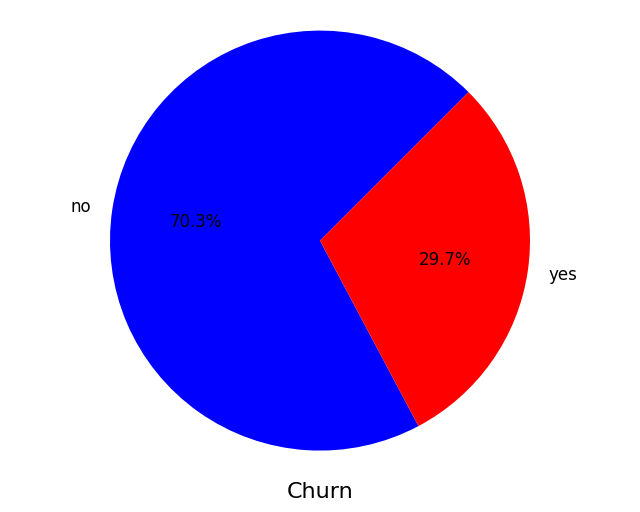

In [133]:
list(pred)
pred_df = new_dftest
pred_df['churn']= pred

uji_test = pred_df['churn'].value_counts()
plt.figure(figsize = (8,6))
colors = ['blue', 'red']
plt.pie(uji_test, labels = ['no', 'yes'],
        colors= colors,
        autopct= '%1.1f%%',
        startangle=45,
        textprops={'fontsize': 12}
        )

plt.xlabel('Churn', fontsize= 16)
plt.axis('equal')
plt.show()


In [134]:
import dalex as dx

In [135]:
naive_explainer = dx.Explainer(nb, X_smote, y_smote, label = "Naive Bayes Interpretation")

Preparation of a new explainer is initiated

  -> data              : 5470 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 5470 values
  -> model_class       : sklearn.naive_bayes.GaussianNB (default)
  -> label             : Naive Bayes Interpretation
  -> predict function  : <function yhat_proba_default at 0x000001BC76773BE0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000472, mean = 0.506, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.00609, max = 0.997
  -> model_info        : package sklearn

A new explainer has been created!


In [136]:
naive_explainer.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 10/10 [00:00<00:00, 40.67it/s]


In [137]:
naive_explainer.model_parts().plot()